# **Get Data**

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import random
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [23]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [24]:
dataset.shape

(398, 8)

In [25]:
dataset.describe()

MPG   Cylinders  Displacement  Horsepower       Weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       Acceleration  Model Year      Origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


# **Data Cleaning**

In [27]:
dataset.dropna(inplace=True)

In [28]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [29]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

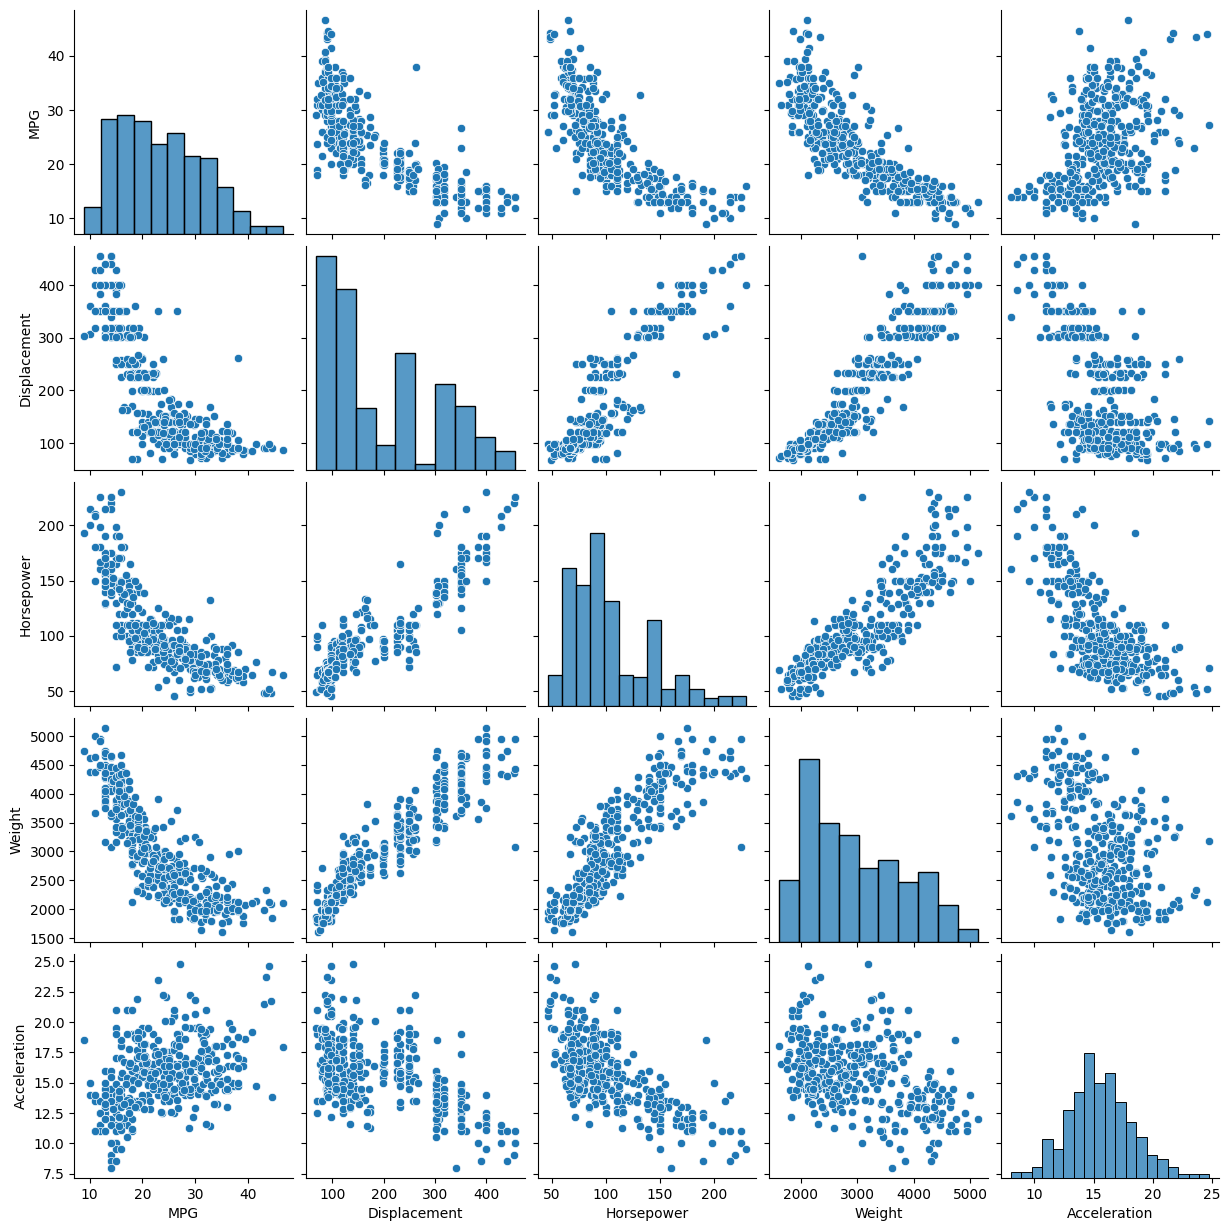

In [30]:
sns.pairplot(dataset[['MPG','Displacement', 'Horsepower', 'Weight','Acceleration']])

In [31]:
dataset.head()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Europe  Japan   USA  
0          70   False  False  True  
1          70   False  False  True  
2          70   False  False  True  
3          70   False  False  True  
4          70   False  False  True

In [32]:
single_feature=dataset[['Horsepower']]
multiple_feature=dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Europe','Japan','USA']]
label=dataset[['MPG']]

# **Modeling Using Polynomial Regression**

In [33]:
degree = 2

poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(multiple_feature)

# Fit linear regression model using polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly, label)

y_poly_pred = poly_model.predict(X_poly)

poly_r2 = r2_score(label, y_poly_pred)
print("R-squared (Polynomial Regression):", poly_r2 * 100)

poly_mse = mean_squared_error(label, y_poly_pred)
print("Mean Squared Error (Polynomial Regression):", poly_mse)

R-squared (Polynomial Regression): 90.17282149126112
Mean Squared Error (Polynomial Regression): 5.971262773524475


In [34]:
poly_model.coef_

array([[-0.   ,  3.882, -0.355,  0.241,  0.005, -3.865, -6.063, -8.845,
        -5.075, 13.92 , -0.493,  0.004,  0.007,  0.001,  0.279, -0.119,
         0.279,  2.312,  1.291,  0.   ,  0.   ,  0.   ,  0.001,  0.005,
        -0.16 , -0.064, -0.131, -0.   , -0.   , -0.008, -0.003,  0.079,
         0.084,  0.078, -0.   , -0.   , -0.   ,  0.004, -0.002,  0.002,
         0.005,  0.057, -0.993, -0.999, -1.873,  0.057, -1.813, -1.979,
        -2.271, -8.845,  0.   ,  0.   , -5.075,  0.   , 13.92 ]])

In [35]:
poly_model.intercept_

array([352.14])

In [36]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(multiple_feature, label)

y_predicted = lasso_model.predict(multiple_feature)
train_r2 = r2_score(label, y_predicted)
print("R-squared (Lasso Regression):", train_r2*100)

train_mse = mean_squared_error(label, y_predicted)
print("Mean Squared Error (Lasso Regression):", train_mse)

R-squared (Lasso Regression): 82.18664576034116
Mean Squared Error (Lasso Regression): 10.823881844447055


In [37]:
lasso_model.coef_

array([-0.067,  0.013, -0.013, -0.007,  0.053,  0.763,  0.   ,  0.   ,
       -1.849])

In [38]:
lasso_model.intercept_

array([-14.823])

In [39]:
# Polynomial Regression with Ridge regularization
poly_model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=0.1))
poly_model.fit(multiple_feature, label)

y_predicted = poly_model.predict(multiple_feature)
train_r2 = r2_score(label, y_predicted)
print("R-squared (Polynomial Regression):", train_r2*100)

train_mse = mean_squared_error(label, y_predicted)
print("Mean Squared Error (Polynomial Regression):", train_mse)

R-squared (Polynomial Regression): 90.10856030952002
Mean Squared Error (Polynomial Regression): 6.010309627305754


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.04859e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
